<a href="https://colab.research.google.com/github/Areefahnk/NNDL-18K41A0505/blob/main/Assignment_03_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simple Linear Regression Model using Stochastic Gradient Descent Optimizer**

**Implementation in Python by - AREEFA (18K41A0505)**

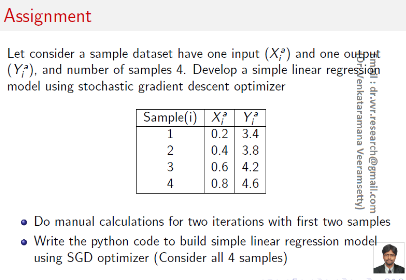

In [424]:
import sympy as sym
from sympy import *
import random

**Simple Linear Refression Model using Stochastic Gradient Descent Optimizer**

In [425]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/samples.xlsx')
df

,sample,x,y
0,1,0.2,3.4
1,2,0.4,3.8
2,3,0.6,4.2
3,4,0.8,4.6


In [426]:
df

,sample,x,y
0,1,0.2,3.4
1,2,0.4,3.8
2,3,0.6,4.2
3,4,0.8,4.6


**STEP 2 Missing Values treatment**

**Found no missing values after visualizing datset**

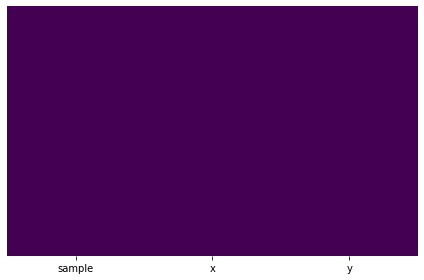

In [427]:
import matplotlib.pyplot as plt
import seaborn as sns
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(df)

In [428]:
df

,sample,x,y
0,1,0.2,3.4
1,2,0.4,3.8
2,3,0.6,4.2
3,4,0.8,4.6


**STEP 3: Outlier Data Treatment**

In [429]:
import numpy as np
#df = pd.DataFrame({'Data':np.random.normal(size=200)})
# example dataset of normally distributed data. 

#df[np.abs(df.sample-df.sample.mean()) <= (3*df.sample.std())]
# keep only the ones that are within +3 to -3 standard deviations in the column 'sample'.
df[np.abs(df.x-df.x.mean()) <= (3*df.x.std())]
# keep only the ones that are within +3 to -3 standard deviations in the column 'x'.
df[np.abs(df.y-df.y.mean()) <= (3*df.y.std())]
# keep only the ones that are within +3 to -3 standard deviations in the column 'y'.

#df[~(np.abs(df.x-df.x.mean()) > (3*df.x.std()))]
# or if you prefer the other way around

,sample,x,y
0,1,0.2,3.4
1,2,0.4,3.8
2,3,0.6,4.2
3,4,0.8,4.6


**NORMALIZATION - MIN MAX SCALING**

In [430]:
#In our case there is not much need to normalize the data as the values of both the columns donot varry much
'''def min_max_scaling(df):
  df_norm = df.copy()
  #apply min max scaling
  ct=0
  for column in df_norm.columns:
    if ct==0: #to skip normalization for the sample number column
      ct=1
    else:
      df_norm[column]=(df_norm[column]-df_norm[column].min())/(df_norm[column].max()-df_norm[column].min())
  return df_norm

df_norm = min_max_scaling(df)
df_norm'''

'def min_max_scaling(df):\n  df_norm = df.copy()\n  #apply min max scaling\n  ct=0\n  for column in df_norm.columns:\n    if ct==0: #to skip normalization for the sample number column\n      ct=1\n    else:\n      df_norm[column]=(df_norm[column]-df_norm[column].min())/(df_norm[column].max()-df_norm[column].min())\n  return df_norm\n\ndf_norm = min_max_scaling(df)\ndf_norm'

**SPLITTING OF DATASET**

In [431]:
x_train = df.iloc[0:3,1:2]
y_train = df.iloc[0:3,2:]
x_test = df.iloc[3:,1:2]
y_test = df.iloc[3:,2:]

In [432]:
x_train

,x
0,0.2
1,0.4
2,0.6


In [433]:
x_test

,x
3,0.8


In [434]:
y_test

,y
3,4.6


In [436]:
#step 1 : initialize model params
mi=1 #model parameters
ci=-1
n=0.1 #learning rate
epochs = 120
iter =1
#ns = df.shape[0]
ns = len(x_train)

#step 2: start iteration and update iter
#iter = iter+1
for iter in range(1,epochs+1):
    #step 3: track samples
    #sample =1
    print("ITERATION : {}".format(iter))
    for sample in range(0,ns):
      xa = x_train['x'][sample].round(2)
      ya = y_train['y'][sample].round(2)
      print("-> SAMPLE {} : ".format(sample+1)+"x = {}".format(xa)+" y = {}".format(ya))
      #print("sample {}".format(x)+" {}".format(y))
      #step 4 calculate gradient wrto each model param
      E=(0.5)*(y-m*x-c)**2  #ERROR FUNCTION
      #declare the variables that you will be using in the error function
      x=sym.Symbol('x')
      y=sym.Symbol('y')
      m=sym.Symbol('m')
      c=sym.Symbol('c')
      deltaE_m=sym.diff(E,m) #differentiation wrto m
      deltaE_c=sym.diff(E,c)  #differentiate wrto c
      print(deltaE_m)
      print(deltaE_c)

      deltaE_m = deltaE_m.subs(m, mi) 
      deltaE_m = deltaE_m.subs(c, ci)
      deltaE_m = deltaE_m.subs(x, xa)
      deltaE_m = deltaE_m.subs(y, ya)  
      deltaE_m = round(deltaE_m,2) 
       
      deltaE_c = deltaE_c.subs(m, mi)
      deltaE_c = deltaE_c.subs(c, ci)
      deltaE_c = deltaE_c.subs(x, xa)
      deltaE_c = deltaE_c.subs(y, ya)
      deltaE_c = round(deltaE_c,2) 

      print('Obtained Gradient wrto m and c:')
      print('deltaE_m: ',deltaE_m)
      print('deltaE_c: ',deltaE_c)

     
      #step 5 : calculate change
      del_m = -n*deltaE_m
      del_c = -n*deltaE_c
      #step 6: update model params
      mi = mi+del_m
      ci = ci+del_c
      print("m: {}".format(mi)+" c = {}".format(ci))
    
print("---------------------------------------------------------------")
print('Optimal Values')
print('m = {}'.format(mi))
print('c = {}'.format(ci))

#step 4: calculate error


ITERATION : 1
-> SAMPLE 1 : x = 0.2 y = 3.4
-1.0*x*(-c - m*x + y)
1.0*c + 1.0*m*x - 1.0*y
Obtained Gradient wrto m and c:
deltaE_m:  -0.84
deltaE_c:  -4.20
m: 1.08398437500000 c = -0.579980468750000
-> SAMPLE 2 : x = 0.4 y = 3.8
-1.0*x*(-c - m*x + y)
1.0*c + 1.0*m*x - 1.0*y
Obtained Gradient wrto m and c:
deltaE_m:  -1.58
deltaE_c:  -3.95
m: 1.24199218750000 c = -0.184960937500000
-> SAMPLE 3 : x = 0.6 y = 4.2
-1.0*x*(-c - m*x + y)
1.0*c + 1.0*m*x - 1.0*y
Obtained Gradient wrto m and c:
deltaE_m:  -2.18
deltaE_c:  -3.64
m: 1.46000976562500 c = 0.179052734375000
ITERATION : 2
-> SAMPLE 1 : x = 0.2 y = 3.4
-1.0*x*(-c - m*x + y)
1.0*c + 1.0*m*x - 1.0*y
Obtained Gradient wrto m and c:
deltaE_m:  -0.59
deltaE_c:  -2.93
m: 1.51899414062500 c = 0.472070312500000
-> SAMPLE 2 : x = 0.4 y = 3.8
-1.0*x*(-c - m*x + y)
1.0*c + 1.0*m*x - 1.0*y
Obtained Gradient wrto m and c:
deltaE_m:  -1.09
deltaE_c:  -2.72
m: 1.62800292968750 c = 0.744091796875000
-> SAMPLE 3 : x = 0.6 y = 4.2
-1.0*x*(-c - m*x + y

In [437]:
df

,sample,x,y
0,1,0.2,3.4
1,2,0.4,3.8
2,3,0.6,4.2
3,4,0.8,4.6


**DENORMALIZING** As we  didnot normalize the data, no need to denormalize. Incase if you had normalized then we need to denormalize by executing below cell by decommenting the code.

In our case no need to execute this cell

In [438]:
'''def denormalize_fun(df):
  df_denormal = df.copy()
  #apply min max scaling
  ct=0
  for column in df_denormal.columns:
    if ct==0: #to skip normalization for the sample number column
      ct=1
    else:
      df_denormal[column]=(df[column])*(df_denormal[column].max()-df_denormal[column].min())+(df_denormal[column].min())
  return df_denormal

res_df = denormalize_fun(df_norm)'''

'def denormalize_fun(df):\n  df_denormal = df.copy()\n  #apply min max scaling\n  ct=0\n  for column in df_denormal.columns:\n    if ct==0: #to skip normalization for the sample number column\n      ct=1\n    else:\n      df_denormal[column]=(df[column])*(df_denormal[column].max()-df_denormal[column].min())+(df_denormal[column].min())\n  return df_denormal\n\nres_df = denormalize_fun(df_norm)'

**ORIGINAL DATASET**

In [439]:
df

,sample,x,y
0,1,0.2,3.4
1,2,0.4,3.8
2,3,0.6,4.2
3,4,0.8,4.6


**CALCULATING THE TRAINING ERROR**

Train and test datasets

In [440]:
x_train = df.iloc[0:3,1:2]
y_train = df.iloc[0:3,2:]
x_test = df.iloc[3:,1:2]
y_test = df.iloc[3:,2:]

In [441]:
x_train

,x
0,0.2
1,0.4
2,0.6


In [442]:
y_train

,y
0,3.4
1,3.8
2,4.2


In [443]:
print("m and c values after applying SGD Algo:")
print(mi)
print(ci)

m and c values after applying SGD Algo:
2.19989013671877
2.91533203125000


In [444]:
y_train_pred = []
for i in range(0,len(x_train)):
  ycalc = mi*x_train['x'][i]+ci
  y_train_pred.append(ycalc)
y_train_pred

[3.35531005859375, 3.79528808593751, 4.23526611328126]

In [445]:
y_train_list = list(y_train['y']) #typecasting tuple to list
y_train_list

[3.4, 3.8, 4.2]

In [446]:
y_train_list

[3.4, 3.8, 4.2]

In [447]:
MSError_train = []
for i in range(0,len(x_train)):
  mse_train = (y_train_list[i]-y_train_pred[i])
  MSError_train.append(mse_train)

print('MSE - TRAINING ERROR obtained:')
MSError_train


MSE - TRAINING ERROR obtained:


[0.0446899414062463, 0.00471191406249138, -0.0352661132812626]

In [448]:
x_train_list = list(x_train['x']) #typecasting tuple to list
x_train_list

[0.2, 0.4, 0.6]

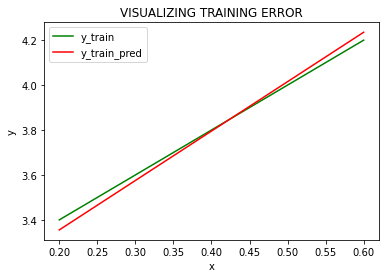

In [449]:
#Plot a line graph
plt.plot(x_train_list,y_train_list,label='y_train',color='green')
plt.plot(x_train_list,y_train_pred,label='y_train_pred',color='red')

# Add labels and title
plt.title("VISUALIZING TRAINING ERROR")
plt.xlabel("x")
plt.ylabel("y")
 
plt.legend()
plt.show()

**CALCULATING TESTING ERROR**

In [450]:
y_test_pred = []
for i in range(3,4):
  ycalc = mi*x_test['x'][i]+ci
  y_test_pred.append(ycalc)
y_test_pred

[4.67524414062502]

In [451]:
y_test

,y
3,4.6


In [452]:
x_test

,x
3,0.8


In [453]:
print("m and c values after applying SGD Algo:")
print(mi)
print(ci)

m and c values after applying SGD Algo:
2.19989013671877
2.91533203125000


In [454]:
y_test_list = list(y_test['y']) #typecasting tuple to list

In [455]:
y_test_list

[4.6]

In [456]:
MSError_test = []
for i in range(0,len(x_test)):
  mse_test = (y_test_list[i]-y_test_pred[i])
  MSError_test.append(mse_test)


print('MSE - TESTING ERROR obtained:')
MSError_test

MSE - TESTING ERROR obtained:


[-0.0752441406250188]

In [457]:
mi=mi.round(2)
ci=ci.round(2)

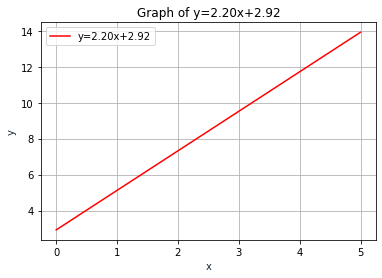

In [458]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0,5,100)
y = mi*x+ci
plt.plot(x, y, '-r', label='y='+str(mi)+'x+'+str(ci))
plt.title('Graph of '+'y='+str(mi)+'x+'+str(ci))
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

**As Training and Testing error approximately = 0. we can conclude the optimal m and c values obtained by applying SGD Algo**

**We can deploy and run this in backend through Flask App**

**BUT FOR TRIAL LETS TAKE USER INPUT (SIMPLE PYTHON)**

In [461]:
print("EQUATION is y=mx+c")
x = float(input('Enter x value to predict y value:'))

y = (mi*x+ci).round(2)
y_test_pred.append(y)
print('Predicted y value: {}'.format(y))

EQUATION is y=mx+c
Enter x value to predict y value:1.8
Predicted y value: 6.88
